In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [5]:
import pandas as pd 
df= pd.read_csv("Fraud_check.csv")
df.dtypes


Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
# EDA
df["Taxable.Income"]
new_Y=[]
for i in df["Taxable.Income"]:
    if i<=30000:
        new_Y.append("Risky")
    else:
        new_Y.append("Good")

In [7]:
new_Y = pd.DataFrame(new_Y)
new_df = pd.concat([df,new_Y],axis=1)
new_df.drop(new_df.columns[[2]],axis=1,inplace=True)
new_df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,0
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [8]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
new_df["Undergrad"] = LE.fit_transform(new_df["Undergrad"])
new_df["Marital.Status"] = LE.fit_transform(new_df["Marital.Status"])
new_df["Urban"] = LE.fit_transform(new_df["Urban"])
new_df


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,0
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [9]:
# Seperating the X and Y variables
X = new_df.iloc[:,0:4]
Y = new_Y


In [10]:
# Standardisation
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X = SS.fit_transform(X)

In [14]:
# Splitting the Train and Test 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3)


In [15]:
# Model Fitting
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=(4)) 
dt.fit(X_train, Y_train)
Y_pred_train = dt.predict(X_train) 
Y_pred_test = dt.predict(X_test)

In [16]:
# Metrics
from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(Y_train,Y_pred_train).round(2))
print("Test Accuracy: ",accuracy_score(Y_test,Y_pred_test).round(2))


Training Accuracy:  0.8
Test Accuracy:  0.81


In [17]:
# Ensemble method
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=(dt),n_estimators=250,max_samples=0.4,max_features=0.6) 
bag.fit(X_train, Y_train)
Y_pred_train = bag.predict(X_train) 
Y_pred_test = bag.predict(X_test) 

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(Y_train,Y_pred_train).round(2))
print("Test Accuracy: ",accuracy_score(Y_test,Y_pred_test).round(2))

Training Accuracy:  0.78
Test Accuracy:  0.83


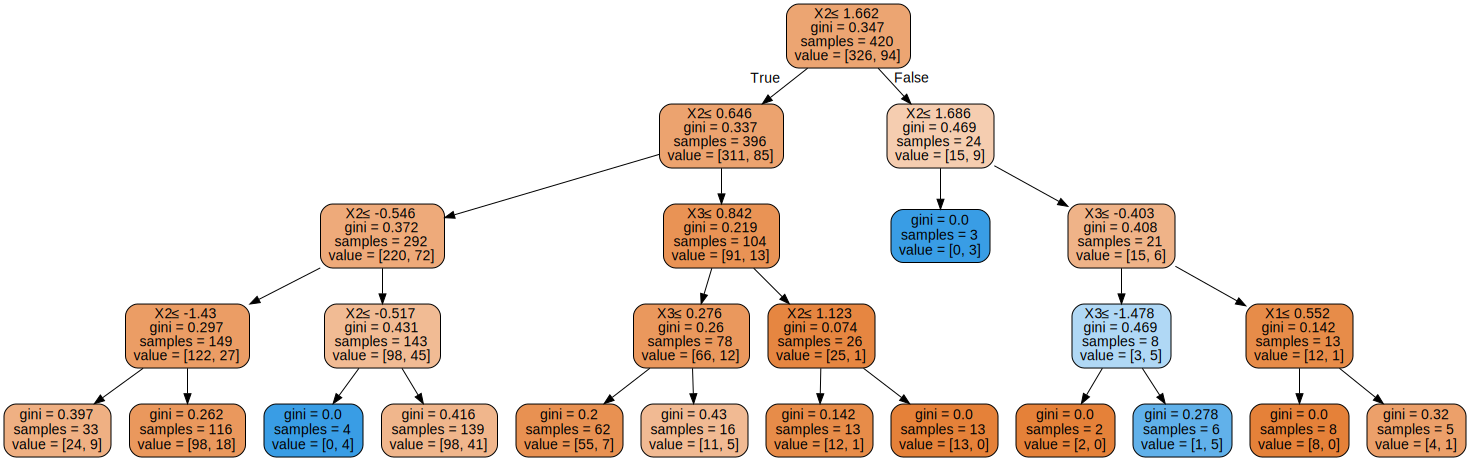

In [23]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(dt, out_file=None, 
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph